# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [2]:
import pandas as pd
import numpy as np
import openpyxl

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)
df.head(5)

# if you wanted a random 30,000 rows, load everything in and then do df = df.sample(30000)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape
# len(df) would also work
# df.shape[0] returns only the number of rows. it selects the first thing in (,). parentheses means tuples
# tuples ~ lists, but tuples are immutable so you can't change what's inside them

(30000, 15)

In [4]:
df.dtypes
# df.info also works, would return more detail

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [8]:
# Not a fan of all these column name spaces... so I'm removing them
df.columns = df.columns.str.replace(' ','')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is one licensed dog in NYC
Primary Breed is what breed the dog is
Owner Zip Code is the NY zip code that the dog's owner lives in

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. How many dogs are (or are not) spayed or neutered?
2. How much time, on average, passes between the date a license application is submitted and when it's actually issued?
3. What zip codes have the most licensed dogs than others?
4. What is the most common name for a licensed dog in NYC?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
df.PrimaryBreed.value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: PrimaryBreed, dtype: int64

<AxesSubplot:>

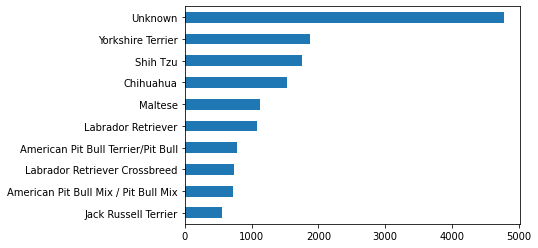

In [13]:
# df.PrimaryBreed.value_counts().head(10).hist()
# should be
df.PrimaryBreed.value_counts().head(10).sort_values().plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

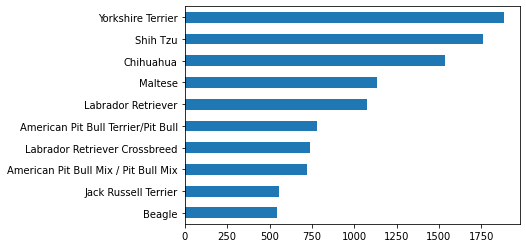

In [14]:
# Replace unknown with NaN (because the Unknowns got annoying later on)
# But could do: df[df.PrimaryBreed!='Unknown'].PrimaryBreed.value_counts().head(10).hist()
df.PrimaryBreed = df.PrimaryBreed.replace({
    'Unknown': np.nan
})

df.PrimaryBreed.value_counts().head(10).sort_values().plot(kind='barh')

## What are the most popular dog names?

In [9]:
df.AnimalName.value_counts().head(10)
# Add UNKNOWN to the NA values

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: AnimalName, dtype: int64

In [16]:
# should force all to lowercase first
df.AnimalName.str.lower().value_counts().head(10)

unknown    476
max        256
bella      236
charlie    207
rocky      171
lola       169
coco       166
lucy       154
no name    147
buddy      139
Name: AnimalName, dtype: int64

In [17]:
# let's make that lowercase permanent
df.AnimalName = df.AnimalName.str.lower()

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [18]:
# No dogs have my name!
df[df.AnimalName=='ilena']

,OwnerZipCode,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate


In [19]:
df[df.AnimalName=='max'].AnimalName.count()
# .shape() or len() whole thing would be better than count

256

In [21]:
df[df.AnimalName=='maxwell'].AnimalName.count()

13

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [13]:
df.GuardorTrained.value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: GuardorTrained, dtype: float64

## What are the actual numbers?

In [14]:
df.GuardorTrained.value_counts()

No     19809
Yes       17
Name: GuardorTrained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [15]:
df.GuardorTrained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: GuardorTrained, dtype: int64

In [22]:
df.GuardorTrained.value_counts(normalize=True, dropna=False)

No     0.660300
NaN    0.339133
Yes    0.000567
Name: GuardorTrained, dtype: float64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df.GuardorTrained = df.GuardorTrained.replace({
    np.nan: 'No'
})

In [17]:
df.GuardorTrained.value_counts(dropna=False)

No     29983
Yes       17
Name: GuardorTrained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
df[df.GuardorTrained=='Yes'].PrimaryBreed.value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: PrimaryBreed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [25]:
df['year'] = df['AnimalBirth'].apply(lambda birth: birth.year)
# because this is a datetime, we can do .dt.year
# df['year'] = df.AnimalBirth.dt.year

# .apply is a mini for-loop, it takes much longer

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [26]:
df['age'] = 2021 - df['year']

In [27]:
df.age.describe()

count    30000.000000
mean        11.712433
std          4.066803
min          6.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         37.000000
Name: age, dtype: float64

In [21]:
df.age.mean()

11.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [29]:
df_zipcode = pd.read_csv('zipcodes-neighborhoods.csv')
df_zipcode.head(5)

# His preferred name convention is having _df at the end instead of at the beginning

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [30]:
merged = df.merge(df_zipcode, left_on='OwnerZipCode', right_on='zip')
merged.head(5)

# to keep dogs that have no neighborhood listed, add a how="left"
# how="inner" only keeps matches
# how="right" would have kept neighborhoods without dogs
# how="outer" would have kept everyone on both sides without a match
# merged = df.merge(df_zipcode, how="left", left_on='OwnerZipCode', right_on='zip')

,OwnerZipCode,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,year,age,neighborhood,zip,borough
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan
2,10024,tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan
3,10024,poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,10024,Manhattan
4,10024,harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [31]:
merged[merged.borough=='Bronx'].AnimalName.value_counts().head(1)

max    31
Name: AnimalName, dtype: int64

In [34]:
merged[(merged.borough=='Brooklyn') & (merged.AnimalName != 'unknown')].AnimalName.value_counts().head(1)

max    64
Name: AnimalName, dtype: int64

In [33]:
merged[merged.neighborhood=='Upper East Side'].AnimalName.value_counts().head(1)

charlie    20
Name: AnimalName, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [27]:
merged.groupby('neighborhood').PrimaryBreed.value_counts().groupby(level=0).head(1)
# merged.groupby('neighborhood').PrimaryBreed.value_counts().groupby(level=0, group_keys=False).nlargest(1) also works 
# but you'd have to add group_keys=False

neighborhood                   PrimaryBreed                        
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [42]:
# CORRECT ANSWER
# returns total number of each species:
# pd.crosstab(df.PrimaryBreed, df.SpayedorNeut)

# to get least likely, normalize by INDEX (if you just do normalize by true, it'll do % of the total)
pd.crosstab(df.PrimaryBreed, df.SpayedorNeut, normalize='index').sort_values('No').head(10)

SpayedorNeut,No,Yes
PrimaryBreed,,
Treeing Walker Coonhound,0.0,1.0
"Coonhound, Black and Tan",0.0,1.0
Bluetick Coonhound,0.0,1.0
Boerboel,0.0,1.0
Kuvasz,0.0,1.0
Standard Schnauzer,0.0,1.0
Kai Ken,0.0,1.0
Bouvier Des Flandres,0.0,1.0
Tibetan Mastiff,0.0,1.0


In [44]:
# AN ALTERNATIVE CORRECT ANSWER
df.pivot_table(index='PrimaryBreed',
               columns='SpayedorNeut',
               aggfunc='size')

# count counts every column (it counts all non-null values), so we use size instead

SpayedorNeut,No,Yes
PrimaryBreed,,
Affenpinscher,3.0,2.0
Afghan Hound,1.0,4.0
Airedale Terrier,2.0,6.0
Akita,7.0,30.0
Akita Crossbreed,3.0,14.0
...,...,...
Wire Fox Terrier,9.0,38.0
Wirehaired Pointing Griffon,2.0,2.0
Xoloitzcuintli,NaN,1.0


In [ ]:
# another example of how pivot tables work: this gets median age for each breed that is spayed or neutered
# df.pivot_table(values='age',
#                index='Primary Breed',
#                columns='Spayed or Neut',
#                aggfunc='median')

In [28]:
# WHAT FOLLOWS ARE MY WRONG ANSWERS 
# Decided that least likely would mean: the percentage of this breed that is spayed is the lowest
df.groupby('PrimaryBreed').SpayedorNeut.value_counts(normalize=True).sort_values().head(5)

PrimaryBreed                   SpayedorNeut
Bassett Hound                  No              0.016949
Greyhound                      No              0.017857
German Shepherd Crossbreed     No              0.033241
Welsh Corgi, Cardigan          No              0.040000
Labrador Retriever Crossbreed  No              0.042005
Name: SpayedorNeut, dtype: float64

In [29]:
# There's a gender that's just a space -- so I'm making that an NaN
# df.AnimalGender.unique()
df.AnimalGender = df.AnimalGender.replace({
    ' ': np.nan
})
df.AnimalGender.unique()

array(['M', 'F', nan], dtype=object)

In [30]:
df.groupby('AnimalGender').SpayedorNeut.value_counts(normalize=True).sort_values().head(5)

AnimalGender  SpayedorNeut
F             No              0.142150
M             No              0.208144
              Yes             0.791856
F             Yes             0.857850
Name: SpayedorNeut, dtype: float64

In [31]:
df.groupby(['PrimaryBreed','AnimalGender']).SpayedorNeut.value_counts(normalize=True).sort_values().head(5)

PrimaryBreed                   AnimalGender  SpayedorNeut
Labrador Retriever Crossbreed  F             No              0.021108
Australian Cattledog           F             No              0.025641
Beagle Crossbreed              F             No              0.026087
Bassett Hound                  M             No              0.027778
German Shepherd Crossbreed     F             No              0.030928
Name: SpayedorNeut, dtype: float64

In [32]:
df.groupby('AnimalGender').SpayedorNeut.value_counts(normalize=True).sort_values().head(5)

AnimalGender  SpayedorNeut
F             No              0.142150
M             No              0.208144
              Yes             0.791856
F             Yes             0.857850
Name: SpayedorNeut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [51]:
# A BETTER SOLUTION
df.AnimalDominantColor = df.AnimalDominantColor.str.lower()
df.AnimalSecondaryColor = df.AnimalSecondaryColor.str.lower()
df.AnimalThirdColor = df.AnimalThirdColor.str.lower()
colors = ['black', 'white', 'grey', 'gray', np.nan]
df['monochrome'] = (df.AnimalDominantColor.isin(colors) & df.AnimalSecondaryColor.isin(colors) & df.AnimalThirdColor.isin(colors))

# first just look at animal domminant color
# df.AnimalDominantColor.str.lower().isin(['black', 'white', 'grey'])

# then add 'or' statement for other colors
# df.AnimalDominantColor.str.lower().isin(['black', 'white', 'grey']) | \
# df.AnimalSecondaryColor.str.lower().isin(['black', 'white', 'grey']) | \
# df.AnimalThirdColor.str.lower().isin(['black', 'white', 'grey'])

In [33]:
# This is absolutely not the best way to do this but this is what I did
df['monochrome'] = df.AnimalDominantColor + df.AnimalSecondaryColor + df.AnimalThirdColor

df.loc[df.monochrome.str.contains('Black', na=False), 'monochrome'] = 'True'
df.loc[df.monochrome.str.contains('BLACK', na=False), 'monochrome'] = 'True'
df.loc[df.monochrome.str.contains('White', na=False), 'monochrome'] = 'True'
df.loc[df.monochrome.str.contains('WHITE', na=False), 'monochrome'] = 'True'
df.loc[df.monochrome.str.contains('Gray', na=False), 'monochrome'] = 'True'
df.loc[df.monochrome.str.contains('GRAY', na=False), 'monochrome'] = 'True'
df.loc[~df.monochrome.str.contains('True', na=False), 'monochrome'] = 'False'

df.monochrome.unique()

array(['False', 'True'], dtype=object)

In [34]:
df.monochrome.value_counts()

False    23874
True      6126
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [35]:
merged.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<AxesSubplot:ylabel='index'>

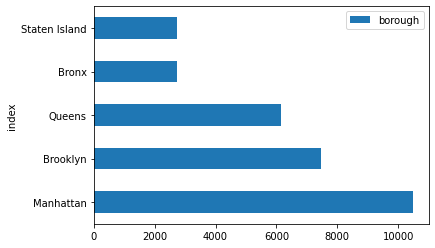

In [36]:
merged.borough.value_counts().reset_index().set_index('index').plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [37]:
df_population = pd.read_csv('boro_population.csv')
df_population.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [38]:
# dogs per capita = number of dogs / number of people
# number of dogs in each borough
df_borough = merged.groupby('borough').AnimalName.count().to_frame().reset_index()
df_borough

,borough,AnimalName
0,Bronx,2743
1,Brooklyn,7444
2,Manhattan,10465
3,Queens,6136
4,Staten Island,2725


In [39]:
# merge to get number of dogs and number of people in each borough
merged_population = df_borough.merge(df_population, left_on='borough', right_on='borough')
merged_population

,borough,AnimalName,population,area_sqmi
0,Bronx,2743,1455444,42
1,Brooklyn,7444,2636735,71
2,Manhattan,10465,1644518,23
3,Queens,6136,2339150,109
4,Staten Island,2725,474558,59


In [40]:
merged_population['dogs_per_capita'] = merged_population.AnimalName / merged_population.population
merged_population

,borough,AnimalName,population,area_sqmi,dogs_per_capita
0,Bronx,2743,1455444,42,0.001885
1,Brooklyn,7444,2636735,71,0.002823
2,Manhattan,10465,1644518,23,0.006364
3,Queens,6136,2339150,109,0.002623
4,Staten Island,2725,474558,59,0.005742


In [41]:
merged_population.sort_values('dogs_per_capita', ascending=False)

,borough,AnimalName,population,area_sqmi,dogs_per_capita
2,Manhattan,10465,1644518,23,0.006364
4,Staten Island,2725,474558,59,0.005742
1,Brooklyn,7444,2636735,71,0.002823
3,Queens,6136,2339150,109,0.002623
0,Bronx,2743,1455444,42,0.001885


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [42]:
merged.groupby('borough').PrimaryBreed.value_counts().groupby(level=0).head(5)

borough        PrimaryBreed                      
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

In [36]:
# Also works
# merged.groupby('borough').PrimaryBreed.value_counts().groupby(level=0, group_keys=False).nlargest(5) 

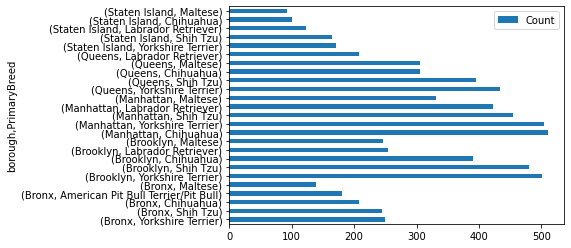

In [46]:
merged.groupby('borough').PrimaryBreed.value_counts().groupby(level=0).head(5).to_frame(name='Count').plot(kind='barh').figsize=(3,4)

## What percentage of dogs are not guard dogs?

In [45]:
df[df.GuardorTrained=='No'].GuardorTrained.count() / len(df)

0.9994333333333333